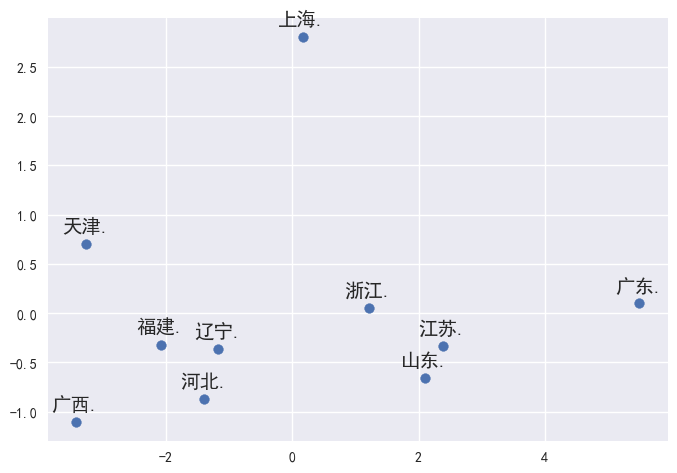

In [45]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
x=citi10_fa['Gross']
y=citi10_fa['Avg']
label=citi10_fa['AREA']
plt.scatter(x, y)
for a,b,l in zip(x,y,label):
    plt.text(a, b+0.1, '%s.' % l, ha='center', va= 'bottom',fontsize=14)
plt.show();

In [43]:
citi10_fa= citi10_fa.rename(columns = {0: "Gross", 1: "Avg"})
citi10_fa.sort_values(['Gross','Avg'],ascending=False)

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,Gross,Avg
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6,5.501759,0.105138
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2.386557,-0.337666
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2.095775,-0.654819
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9,1.209012,0.048116
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0,0.163901,2.802894
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,-1.174241,-0.364178
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,-1.399899,-0.870629
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9,-2.084500,-0.322173
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,-3.265185,0.698849
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7,-3.433179,-1.105531


In [31]:
#因子得分
fa_scores = fa.get_component_scores(st_data)
citi10_fa=pd.concat([df, pd.DataFrame(fa_scores)], axis=1)
# citi10_fa= citi10_fa.rename(columns = {0: "Gross", 1: "Avg"})

In [27]:
# 3.通过最大方差法进行因子旋转
fa.rotate_components()
#查看因子权重(旋转后的权重)
pd.DataFrame(fa.comps['rot'])

,0,1
0,0.362880,-0.196047
1,-0.001947,0.943648
2,0.364222,0.006565
3,0.369255,-0.028775
4,0.361258,0.111596
5,0.352799,-0.007144
6,0.370140,-0.118691
7,0.295099,0.061400
8,0.346765,0.199650


In [26]:
# 因子分析的主成分法
# 2.设定提取主成分的方式，建议使用“top_n”法
fa.find_comps_to_retain(method='top_n', num_keep = 2)

array([0, 1], dtype=int64)

In [25]:
# 因子分析   pip install fa_kit
# 1.因子分析的概念很多，作为刚入门的人，我们可以认为因子分析是主成分分析的延续
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting
fa = FactorAnalysis.load_data_samples(
    st_data,     #标准化数据
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()

In [24]:
# 主因成分得分
score = pd.DataFrame(pca_2.fit_transform(st_data))
city_pca= pd.concat([df,score],axis=1)
city_pca= city_pca.rename(columns={0:'score_1',1:'score_2'})
# 按得分排名
city_pca.sort_values(['score_1','score_2'],ascending=False)

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,score_1,score_2
8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6,5.500912,-0.142758
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2.368927,-0.444810
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2.064157,-0.748544
6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9,1.209952,-0.006385
5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0,0.289972,2.792668
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,-1.189451,-0.310922
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,-1.437690,-0.806697
7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9,-2.096895,-0.227964
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,-3.230397,0.845198
9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7,-3.479486,-0.949785


In [21]:
# 通过主成分在每个变量上的权重的大小，确定每个主成分的代表性(特征向量)
pd.DataFrame(pca_2.components_).T  #第一个主成分在每个原始变量上的原始权重

,0,1
0,0.353682,-0.212192
1,0.040555,0.942778
2,0.364148,-0.009845
3,0.367584,-0.045377
4,0.365917,0.095213
5,0.352119,-0.023027
6,0.364419,-0.135241
7,0.297565,0.048047
8,0.355405,0.183830


In [19]:
# 查看调整后的方差及方差比率
pca_2.explained_variance_
pca_2.explained_variance_ratio_

array([8.01129553, 1.22149318])

array([0.80112955, 0.12214932])

In [17]:
#模型调整(重新拟合模型)
pca_2 = PCA(n_components=2)
pca_2.fit(st_data)

PCA(n_components=2)

In [16]:
# 查看方差及方差比率
pca.explained_variance_
pca.explained_variance_ratio_

array([8.01129553e+00, 1.22149318e+00, 6.07923991e-01, 9.88894782e-02,
       3.86004507e-02, 1.51746715e-02, 4.88067443e-03, 1.33610801e-03,
       4.05920593e-04])

array([8.01129553e-01, 1.22149318e-01, 6.07923991e-02, 9.88894782e-03,
       3.86004507e-03, 1.51746715e-03, 4.88067443e-04, 1.33610801e-04,
       4.05920593e-05])

In [15]:
# 开始进行主因成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(st_data)

PCA(n_components=9)

In [14]:
# 3.做主成分之前，进行中心标准化
from sklearn import preprocessing
st_data = preprocessing.scale(data)
st_data

array([[-0.37574772, -0.33589708, -0.57070001, -0.33180084, -0.4351153 ,
        -0.68608742, -0.13882664, -0.44958874, -0.36008526],
       [ 1.19924012, -0.48315182,  1.14473196,  0.98455823,  0.79990984,
         0.8650543 ,  0.66401891, -0.27809633,  0.34976628],
       [-0.18446517, -0.76485655, -0.54609356, -0.46884237, -0.63100796,
        -0.49108511, -0.39102534, -0.60224445, -0.68853914],
       [-1.43844228,  0.6481162 , -1.01716572, -1.40498973, -1.21233816,
        -1.16457327, -1.28376177, -0.46528598, -1.12861338],
       [ 1.2259343 , -0.18430174,  1.17200074,  1.08060301,  0.83964698,
         1.06721529,  0.6934899 ,  0.0625339 ,  0.46273553],
       [-0.39102805,  2.66204455,  0.09085021,  0.07932373,  0.3955559 ,
         0.03063913, -0.33286576, -0.06343649,  0.68294126],
       [ 0.3084029 ,  0.05150118,  0.22017521,  0.33489213,  0.80993934,
         1.17974966,  0.39938849, -0.11504119,  0.20374931],
       [-0.61584072, -0.28055447, -0.83620754, -0.66192379, -0

In [12]:
data = df.iloc[:,1:]
data.head(1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7


In [11]:
df.head(1)

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7


In [6]:
df = pd.read_csv('cities_10.csv',encoding='gbk')
df.head()

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模\连续变量降维')